In [1]:
import tensorflow as tf

In [36]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ReduceLROnPlateau

import os
import random
from shutil import copyfile
import cv2

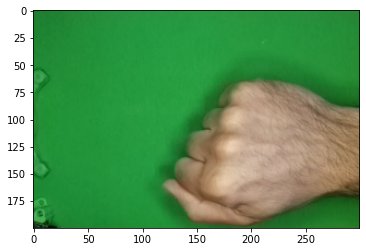

In [24]:
img = image.load_img(r'C:\Users\Kushagra\Downloads\rsc\rps-cv-images\rock\00nKV8oHuTGi20gq.png')
plt.imshow(img)


In [28]:
cv2.imread(r'C:\Users\Kushagra\Downloads\rsc\rps-cv-images\rock\00nKV8oHuTGi20gq.png').shape

(200, 300, 3)

In [31]:
TRAINING_DIR = r'C:\Users\Kushagra\Downloads\rsc\rps-cv-images'
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  rotation_range= 20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest',
                                  validation_split=0.2)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(60, 40),
                                                   subset='training')

validation_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        validation_split=0.2)


validation_generator = validation_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(60, 40),
                                                    subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), activation=tf.nn.relu,input_shape=(60, 40, 3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation = tf.nn.softmax)
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 36, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 36, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 36, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 9, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16128)             0

In [37]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)

In [39]:
model.compile(loss='categorical_crossentropy',optimizer =tf.keras.optimizers.Adam(),metrics=['acc'])

history = model.fit(train_generator,
                   epochs=25,
                   verbose=1,
                   validation_data = validation_generator,
                   callbacks = [learning_rate_reduction])

Train for 55 steps, validate for 14 steps
Epoch 1/25
55/55 [==============================] - 47s 854ms/step - loss: 1.0574 - acc: 0.6271 - val_loss: 1.0524 - val_acc: 0.3707
Epoch 2/25
55/55 [==============================] - 50s 902ms/step - loss: 0.2800 - acc: 0.8961 - val_loss: 0.9592 - val_acc: 0.6453
Epoch 3/25
55/55 [==============================] - 50s 902ms/step - loss: 0.1920 - acc: 0.9298 - val_loss: 0.8411 - val_acc: 0.6773
Epoch 4/25
55/55 [==============================] - 46s 844ms/step - loss: 0.1179 - acc: 0.9606 - val_loss: 0.4907 - val_acc: 0.9222
Epoch 5/25
55/55 [==============================] - 52s 954ms/step - loss: 0.1373 - acc: 0.9595 - val_loss: 0.4258 - val_acc: 0.9817
Epoch 6/25
55/55 [==============================] - 52s 952ms/step - loss: 0.1009 - acc: 0.9703 - val_loss: 0.8753 - val_acc: 0.6499
Epoch 7/25
54/55 [============================>.] - ETA: 0s - loss: 0.1198 - acc: 0.9628
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.000500000023

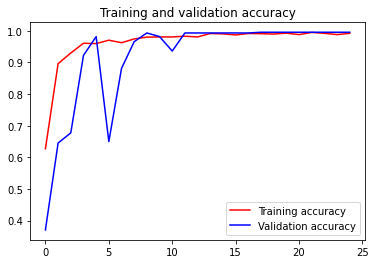

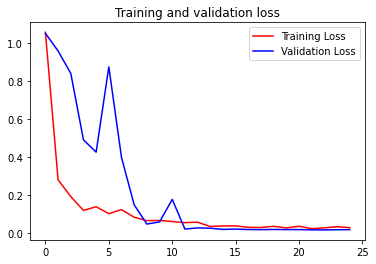

In [40]:
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()